In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

# 로지스틱 회귀
from statsmodels.api import Logit

from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

matplotlib.rc("font", family = "Malgun Gothic")

In [3]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./df_t.csv")
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Vol
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,934,1,8,2조,7.850335
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,937,1,8,2조,7.850335
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,889,1,8,3조,7.850280
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,885,1,8,3조,7.850280
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,873,1,8,1조,7.850376


In [4]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, #test 데이터의 비율
                                     random_state = 1234) # random state

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (504, 21)
test data size: (216, 21)


In [5]:
df_raw.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR', 'Vol'],
      dtype='object')

In [6]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,Vol
SCALE,1.000,-0.125,-0.206,0.100,0.219,-0.023,0.248,0.056,0.375,-0.240,-0.049,0.551,-0.319,-0.007,0.241
PT_THK,-0.125,1.000,-0.313,-0.863,-0.397,-0.003,-0.524,0.160,-0.695,0.113,0.413,-0.511,-0.018,-0.837,-0.447
PT_WDTH,-0.206,-0.313,1.000,0.120,0.031,0.007,0.180,-0.119,0.227,0.023,-0.393,-0.108,-0.042,0.338,-0.076
PT_LTH,0.100,-0.863,0.120,1.000,0.452,-0.021,0.473,-0.077,0.645,-0.070,-0.252,0.442,-0.018,0.809,0.447
PT_WGT,0.219,-0.397,0.031,0.452,1.000,-0.022,0.153,0.010,0.360,-0.191,-0.058,0.423,0.023,0.239,0.939
FUR_NO_ROW,-0.023,-0.003,0.007,-0.021,-0.022,1.000,0.005,-0.016,0.009,0.049,0.016,-0.005,-0.021,0.018,-0.003
FUR_HZ_TEMP,0.248,-0.524,0.180,0.473,0.153,0.005,1.000,-0.114,0.773,-0.222,-0.348,0.365,-0.036,0.471,0.179
FUR_HZ_TIME,0.056,0.160,-0.119,-0.077,0.010,-0.016,-0.114,1.000,-0.203,0.178,0.473,0.002,0.009,-0.138,-0.038
FUR_SZ_TEMP,0.375,-0.695,0.227,0.645,0.360,0.009,0.773,-0.203,1.000,-0.451,-0.477,0.668,-0.039,0.649,0.387
FUR_SZ_TIME,-0.240,0.113,0.023,-0.070,-0.191,0.049,-0.222,0.178,-0.451,1.000,0.443,-0.374,-0.008,-0.106,-0.208


In [7]:
# 분석 대상 이벤트 = "1"
log_model = Logit.from_formula("""SCALE ~ C(SPEC) + C(STEEL_KIND) + STEEL_KIND + PT_WDTH+ PT_LTH +PT_WGT + C(FUR_NO) +
                                    FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME
                                    +ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING +C(WORK_GR) + Vol""", df_train)

# 적합
log_result = log_model.fit(method='bfgs')
# 결과 출력
print(log_result.summary())

         Current function value: 0.259143
         Iterations: 35
         Function evaluations: 52
         Gradient evaluations: 41
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                           81
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                  0.5853
Time:                        21:18:26   Log-Likelihood:                -130.61
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 2.638e-38
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.2330        nan        nan

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1735: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1788: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1735: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1788: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Li

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [9]:
y = df_raw["SCALE"]
df_X = df_raw.drop(["SCALE", "PLATE_NO"], axis =1)
X = pd.get_dummies(df_X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =11)
print(X_train.shape, X_test.shape)

(504, 800) (216, 800)


In [11]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
log_result = LogisticRegression().fit(X, y)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
log_result.coef_

array([[-3.23430306e-03, -7.18603653e-04, -2.49072740e-05,
         2.41470332e-06, -1.60895764e-04, -3.61006350e-03,
         3.26367497e-03, -1.66817421e-02, -1.15855544e-02,
        -2.07272043e-03,  2.79113934e-02, -1.02065001e-03,
        -1.15793662e-03, -1.21152037e-03, -8.99507808e-06,
        -9.84858958e-06, -4.80702040e-06, -2.92788992e-06,
        -4.89109196e-06, -4.49010223e-06, -4.57194324e-06,
        -5.55741296e-06, -5.47837314e-06, -4.85064948e-06,
        -4.82298830e-06,  6.85273640e-06, -1.89461266e-06,
         2.03058330e-05, -1.67739095e-05, -1.69919674e-05,
        -3.22602597e-05, -1.66503456e-05, -1.50277881e-05,
        -7.68376895e-06, -4.42698922e-06, -4.81055650e-06,
        -3.90928228e-06, -4.03615581e-06, -4.47130632e-06,
        -1.29688788e-05, -1.36094933e-05, -1.32637220e-05,
        -1.47298561e-05, -1.25492171e-05, -1.54271668e-05,
        -2.78403964e-06, -1.49938644e-06, -2.15018103e-06,
        -2.23799555e-06, -2.10306105e-06, -2.32774226e-0

In [20]:
len(log_result.coef_[0])

800

In [21]:
# 변수명 저장
v_feature_name = X_train.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = log_result.coef_[0]
# feature_importances의 테이블 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = True, inplace = True)
df_importance.round(3)

,Feature,Importance
7,FUR_SZ_TEMP,-0.017
8,FUR_SZ_TIME,-0.012
5,FUR_HZ_TEMP,-0.004
0,PT_THK,-0.003
9,FUR_TIME,-0.002
13,Vol,-0.001
12,ROLLING_DESCALING,-0.001
11,HSB,-0.001
1,PT_WDTH,-0.001
794,FUR_NO_2호기,-0.000


Text(0, 0.5, '설명변수')

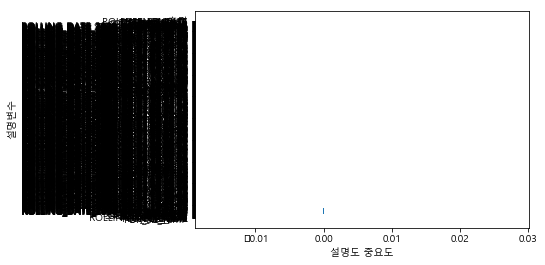

In [22]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

Text(0, 0.5, '설명변수')

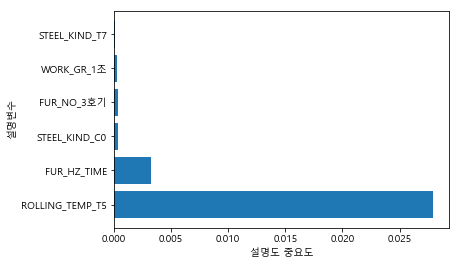

In [23]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
coordinates = range(6)
plt.barh(y = coordinates, width = df_importance["Importance"][:6])
plt.yticks(coordinates, df_importance["Feature"][:6])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [24]:
df_importance["Importance"][:6]

10     0.027911
6      0.003264
784    0.000358
795    0.000326
796    0.000307
791    0.000130
Name: Importance, dtype: float64

Text(0, 0.5, '설명변수')

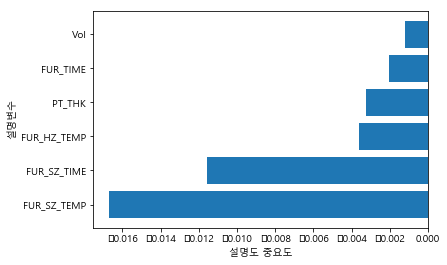

In [25]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(6)
plt.barh(y = coordinates, width = df_importance["Importance"][:6])
plt.yticks(coordinates, df_importance["Feature"][:6])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [26]:
df_importance["Importance"][:6]

7    -0.016682
8    -0.011586
5    -0.003610
0    -0.003234
9    -0.002073
13   -0.001212
Name: Importance, dtype: float64

In [27]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_result = LogisticRegression()

# fit the model with data
log_result.fit(X_train,y_train)

#
y_pred=log_result.predict(X_test)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[128,  23],
       [ 15,  50]], dtype=int64)

In [29]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

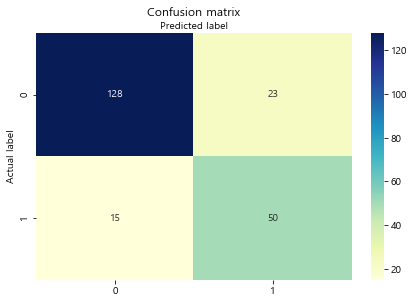

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8240740740740741
Precision: 0.684931506849315
Recall: 0.7692307692307693


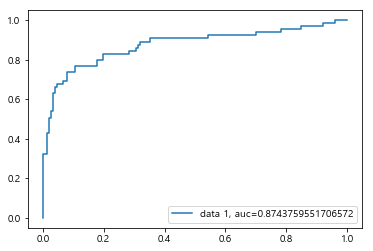

In [34]:
y_pred_proba = log_result.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
log_result.coef_

array([[-3.36500307e-03, -5.01053435e-04, -2.11809060e-05,
         2.82995377e-06, -1.23543982e-04, -7.34206332e-03,
         6.34110468e-03, -1.04838536e-02, -1.00250509e-02,
        -4.57043949e-03,  2.46024480e-02, -4.77459674e-04,
        -3.31989854e-04,  1.11231871e-04, -4.44682563e-06,
        -4.77134076e-06,  0.00000000e+00, -1.75345460e-06,
         0.00000000e+00, -2.68542155e-06, -2.83782297e-06,
         0.00000000e+00, -3.21616294e-06, -2.91204753e-06,
        -2.85724732e-06,  0.00000000e+00, -1.55755539e-06,
         1.14983575e-05, -8.67697190e-06, -8.93597204e-06,
        -1.74107556e-05, -9.03011973e-06, -8.87648851e-06,
         0.00000000e+00,  0.00000000e+00, -4.01785072e-06,
        -3.60684252e-06, -3.70440140e-06,  0.00000000e+00,
        -7.26775373e-06,  0.00000000e+00, -7.55307490e-06,
        -8.13450669e-06, -7.33133395e-06, -8.37628835e-06,
         0.00000000e+00, -1.34229743e-06, -1.71014934e-06,
        -1.75612860e-06, -1.69268834e-06, -1.79028980e-0

In [36]:
 # Set values of the grid search
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
# Set the amount of folds for the cross-validation
n_folds = 5
# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train,y_train)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=7, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
LGR = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=7, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [38]:
LGR.fit(X_train,y_train)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
LGR.score(X,y)

0.8291666666666667

In [40]:
f1_score(y_test, y_pred)

0.7246376811594203